In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
import random


In [2]:
#introducción de los datos
#N es la cantidad de datos, NN el número de iteraciones para el programa caminante
#definición de av y bv para guardar los parámetros que cumplen la regla de selección
#av[0] y bv[0] son los parametros iniciales dados por uno, cv, y la creación de otras listas es para 
#parametros de otros modelos
#x1 y y1 son los datos 
N=50
NN=10000
dt=np.load('fit_exercise.npy')
x1 = dt[0]
y1 = dt[1]
yerr=dt[2]
v=0.1
av=np.zeros(NN)
bv=np.zeros(NN)

In [3]:
def modelo(a, b):
        mod = a + (b*x1)
    #mod=a*(x**2)+b*x + c
    #mod=a*np.cos(b*x)+c
        return mod

In [4]:
# logaritmo de likelihood gaussiano
yerr=dt[2]
def ls(a, b):
        mu = modelo(a, b)
        #-np.sum(np.log(np.sqrt(2*np.pi*(yerr**2)))
        return -0.5*np.sum((yerr**(-2))*(y1-mu)**2 + np.log(2*np.pi*(yerr**2)))

In [5]:
def prior(a, b):
    if -10<a<10 and -10<b<10:
        return 0
    return -np.inf

In [6]:
def posterior(a, b):
    pos=ls(a, b) + prior(a, b)
    return pos

In [7]:
def MCM4(p1, p2):
#v, sigma propuesta donde centramos los datos
#vector a guardar parametros, av, bv, cv, dependiendo del modelo
#hay que modificar los parametros que pide modelo, likelihood y MCM2
#likelihood, puede ser distinto al gaussiano
#x1, y1 los datos
#n cantidad de datos
#NN iteraciones
    #v = np.var(y1)
    av[0] = p1
    bv[0] = p2
    accepteda = []
    acceptedb = []
    rejecteda = []
    rejectedb = []
    for k in range(NN-1):
        ak = np.random.normal(av[k], v)
        bk = np.random.normal(bv[k], v)
        posteriorold = posterior(av[k], bv[k])
        posteriornew = posterior(ak, bk)
        ratio=posteriornew - posteriorold
        ran = np.log(random.uniform(0, 1))
        if (ratio > 0):
            av[k+1] = ak
            bv[k+1] = bk
            accepteda.append(ak)
            acceptedb.append(bk)
        else:
            if ratio > ran:
                av[k+1] = ak
                bv[k+1] = bk
                accepteda.append(ak)
                acceptedb.append(bk)
            else:
                av[k+1] = np.copy(av[k])
                bv[k+1] = np.copy(bv[k])
                rejecteda.append(ak)
                rejectedb.append(bk)  
    ta=np.array(accepteda)
    tb=np.array(acceptedb)
    #return ta, tb, ra, rb, plt.plot(ta, tb, 'o'), print('el parámetro a es', ta.mean()), print('el parámetro b es', tb.mean())
    return plt.plot(ta, tb, 'o'), print('el parámetro a es', av.mean()), print('el parámetro b es', bv.mean()), print('la aceptación es', len(ta)/NN )
    

el parámetro a es 5.427306752969394
el parámetro b es -1.1022163299461822
la aceptación es 0.0641


([<matplotlib.lines.Line2D at 0x1afa8deb3d0>], None, None, None)

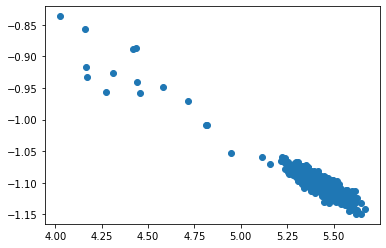

In [8]:
#con v=0.1
MCM4(4, -0.7)

In [9]:
#cambiando v
v=0.01

el parámetro a es 5.391000505018973
el parámetro b es -1.0952575052240716
la aceptación es 0.5805


([<matplotlib.lines.Line2D at 0x1afa911f190>], None, None, None)

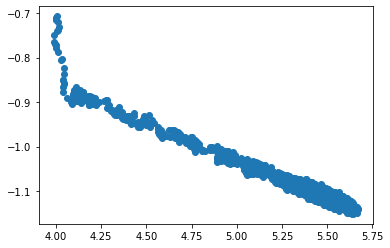

In [10]:
MCM4(4, -0.7)

In [11]:
#de nuevo cambiando v
v=0.001

el parámetro a es 4.355015901156277
el parámetro b es -0.9222333793875187
la aceptación es 0.9197


([<matplotlib.lines.Line2D at 0x1afaa1458e0>], None, None, None)

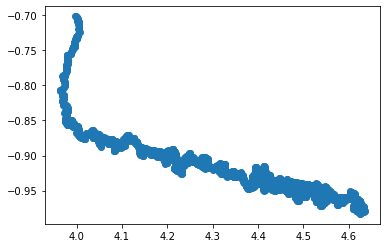

In [12]:
MCM4(4, -0.7)

En este caso una varianza con la que centramos los datos y aceptación adecuados no son compatibles